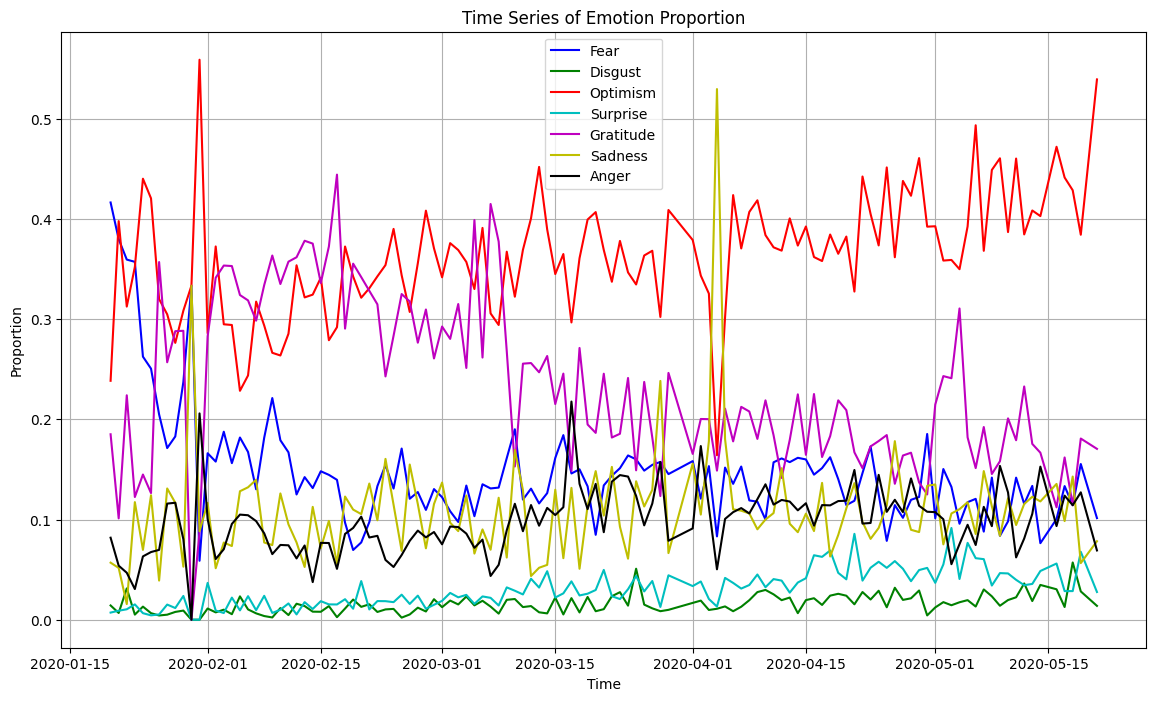

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('./sentiment_result_1.csv')

# 确保发布时间列被解析为日期时间格式
df['发布时间'] = pd.to_datetime(df['发布时间'])

# 设置发布时间为索引
df.set_index('发布时间', inplace=True)
resampled_df = df.groupby(pd.Grouper(freq='D'))['predictions'].value_counts(normalize=True).unstack(fill_value=0)

# 绘制时间序列变化图
plt.figure(figsize=(14, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # 预定义7种颜色
label_dist = ["Fear","Disgust","Optimism","Surprise","Gratitude","Sadness","Anger"]
for i in range(7):
    plt.plot(resampled_df.index, resampled_df[i], label=label_dist[i], color=colors[i])

plt.title('Time Series of Emotion Proportion')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.legend()
plt.grid(True)
plt.show()


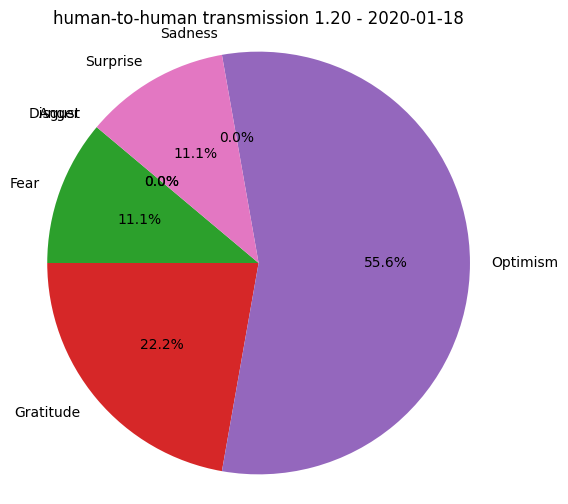

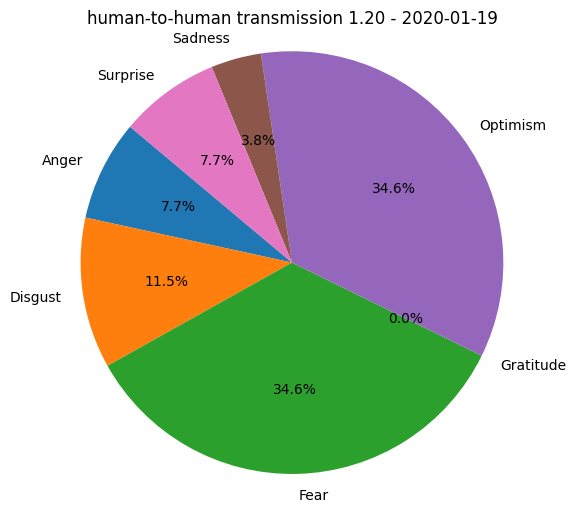

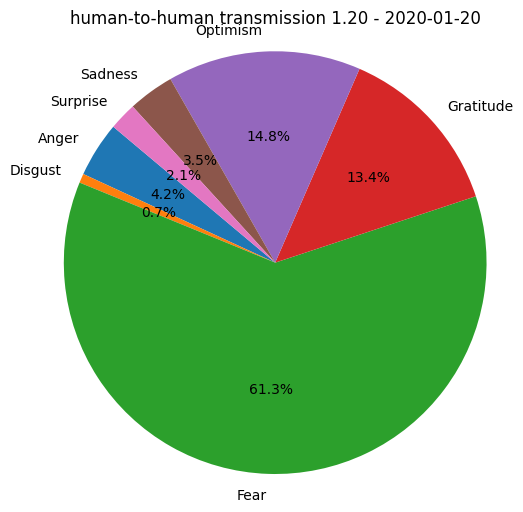

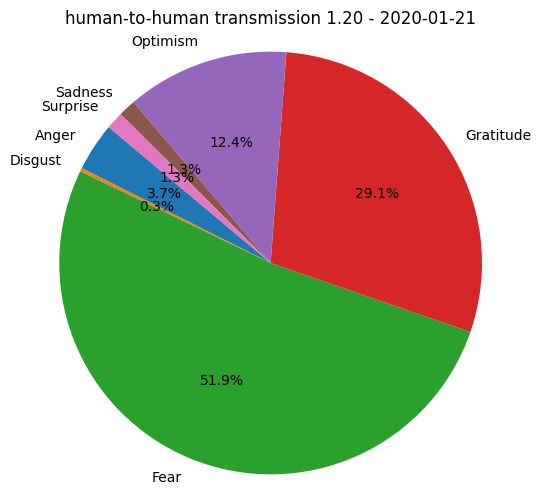

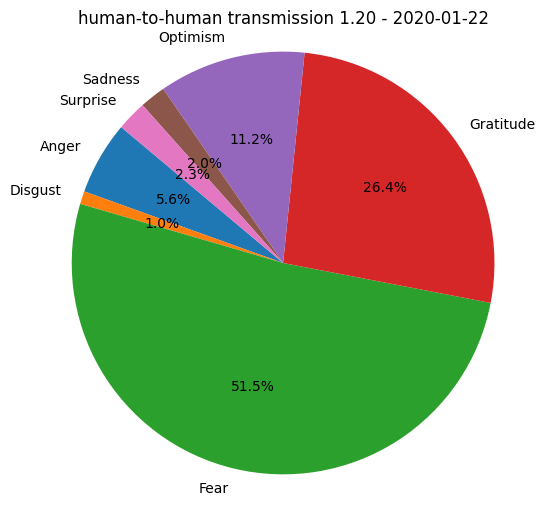

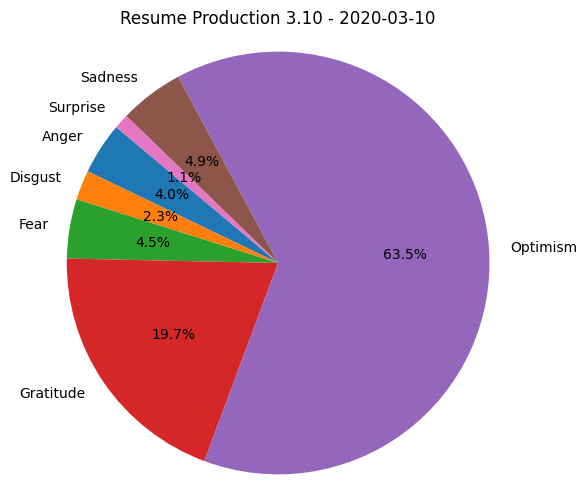

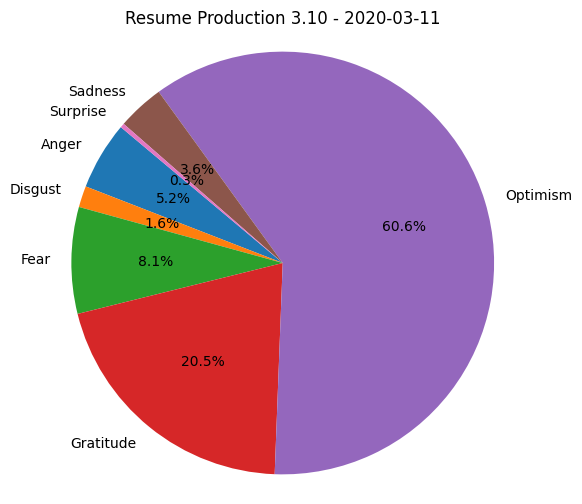

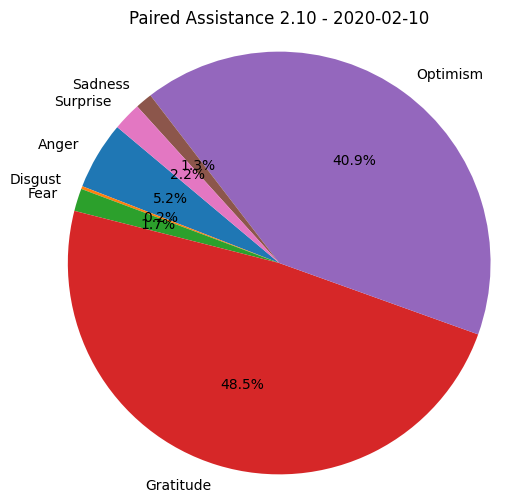

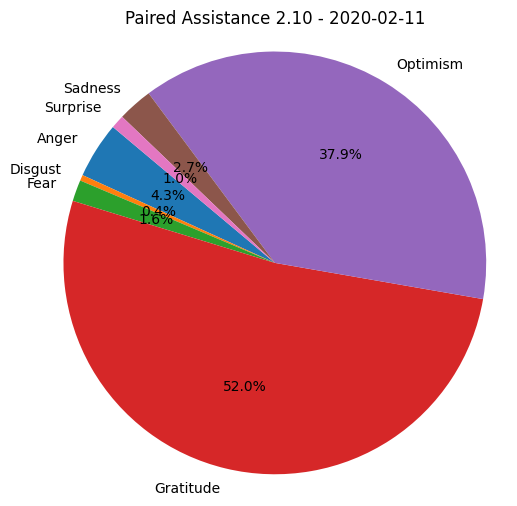

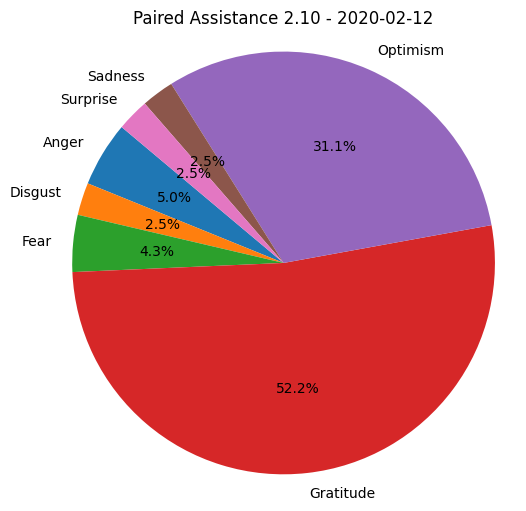

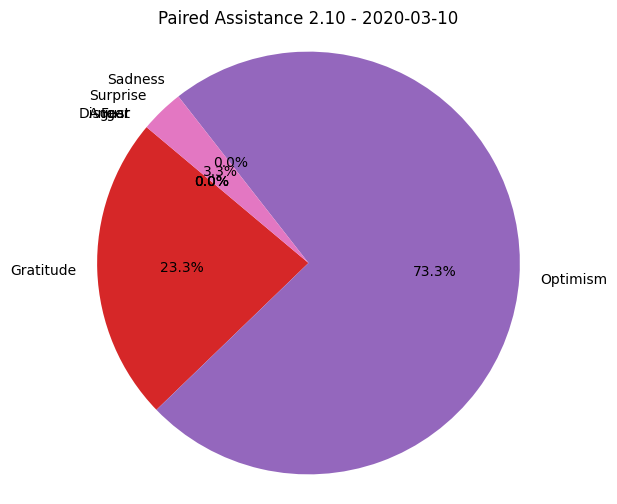

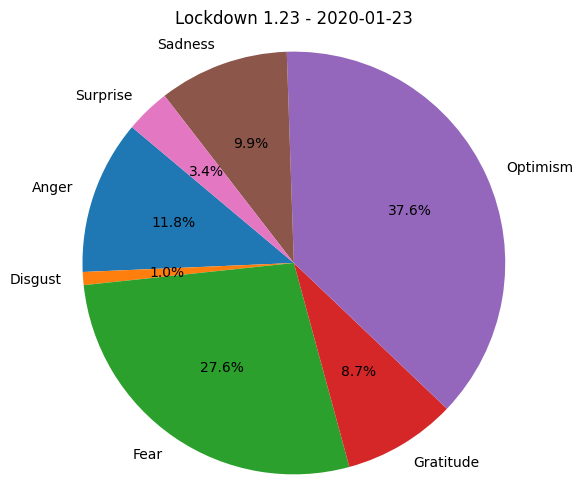

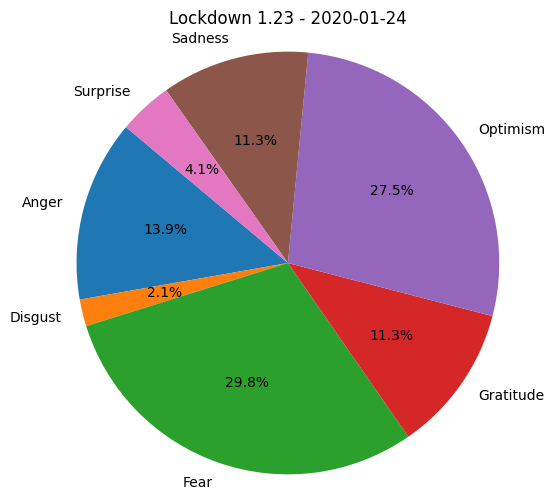

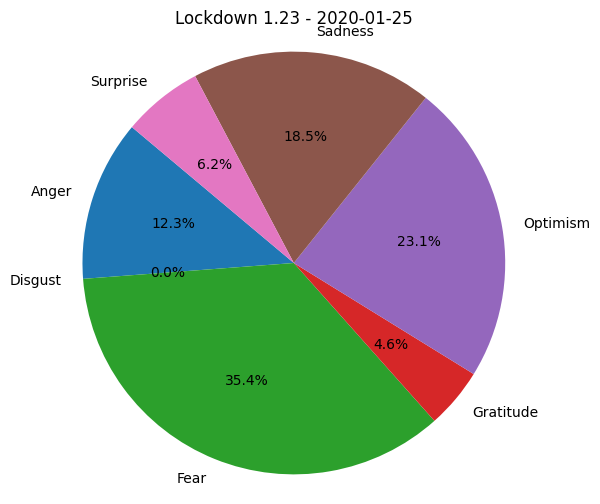

In [5]:
import os
df2 = pd.read_csv('./sentiment_result_2.csv')

# 提取事件名称（假设事件名称是文件名前缀）
df2['事件'] = df2['来源文件'].apply(lambda x: os.path.splitext(x)[0])

# 确保发布时间列被解析为日期时间格式，并提取日期部分
df2['日期'] = pd.to_datetime(df2['发布时间']).dt.date
label_dist = ["Fear","Disgust","Optimism","Surprise","Gratitude","Sadness","Anger"]
df2['emotions'] = df2['predictions'].apply(lambda x: label_dist[x])
# 按事件和日期分组，计算每个事件每天的情感分布
grouped = df2.groupby(['事件', '日期', 'emotions']).size().unstack(fill_value=0)
event_dist = {"封城1.23":"Lockdown 1.23","对口支援2.10":"Paired Assistance 2.10","复工3.10":"Resume Production 3.10","人传人1.20":"human-to-human transmission 1.20"}
# 绘制饼图
for (event_date), group in grouped.groupby(level=[0, 1]):
    event, date = event_date  # 解包元组
    event = event_dist[event]
    plt.figure(figsize=(6, 6))
    
    labels = group.columns
    sizes = group.values.flatten()
    
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'{event} - {date}')
    plt.axis('equal')  # 确保饼图是圆形 
    plt.show()

In [15]:
from pyecharts.charts import Map, Bar
from pyecharts import options as opts
df2 = pd.read_csv('./sentiment_result_2.csv')

# 提取事件名称（假设事件名称是文件名前缀）
df2['事件'] = df2['来源文件'].apply(lambda x: os.path.splitext(x)[0])
city_dist={"上海":"上海市","云南":"云南省","其他":"其他","内蒙古":"内蒙古自治区","北京":"北京市","台湾":"台湾省","吉林":"吉林省","四川":"四川省","天津":"天津市","宁夏":"宁夏回族自治区","安徽":"安徽省","山东":"山东省"\
           ,"山西":"山西省","广东":"广东省","广西":"广西壮族自治区","新疆":"新疆维吾尔自治区","江苏":"江苏省","江西":"江西省","河北":"河北省","河南":"河南省","浙江":"浙江省","海南":"海南省"\
               ,"海外":"海外","湖北":"湖北省","湖南":"湖南省","澳门":"澳门特别行政区","甘肃":"甘肃省","福建":"福建省",\
"西藏":"西藏自治区","贵州":"贵州省","辽宁":"辽宁省","重庆":"重庆市","陕西":"陕西省","青海":"青海省","香港":"香港特别行政区","黑龙江":"黑龙江省"}
df2['地区'] = df2['发布者地区'].apply(lambda x: city_dist[x])
# 确保发布时间列被解析为日期时间格式，并提取日期部分
df2['日期'] = pd.to_datetime(df2['发布时间']).dt.date
label_dist = ["Fear","Disgust","Optimism","Surprise","Gratitude","Sadness","Anger"]
df2['emotions'] = df2['predictions'].apply(lambda x: label_dist[x])
# 按事件和日期分组，计算每个事件每天的情感分布
grouped = df2.groupby(['事件', '日期'])
#event_dist = {"封城1.23":"Lockdown 1.23","对口支援2.10":"Paired Assistance 2.10","复工3.10":"Resume Production 3.10","人传人1.20":"human-to-human transmission 1.20"}
# 绘制饼图
for (event, date), group in grouped:
    # 提取每个地域的主要情感
    emotion_distribution = group.groupby('地区')['predictions'].value_counts().unstack(fill_value=0)
    emotion_distribution['Main Emotion'] = emotion_distribution.idxmax(axis=1)
    
    # 计算每个地域的主要情感比例
    main_emotion_proportion = emotion_distribution.max(axis=1) / emotion_distribution.sum(axis=1)

    # 创建地域情感分布地图
    emotion_map = (
        Map()
        .add(
            "Main Emotion",
            [list(z) for z in zip(emotion_distribution.index, emotion_distribution['Main Emotion'])],
            "china"
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Regional Emotion Distribution Map"),
            visualmap_opts=opts.VisualMapOpts(max_=6, is_piecewise=True, pieces=[
                {"min": 6, "max": 6, "label": "Anger", "color": "#ff0000"},
                {"min": 5, "max": 5, "label": "Sadness", "color": "#ff7f50"},
                {"min": 4, "max": 4, "label": "Gratitude", "color": "#ffff00"},
                {"min": 3, "max": 3, "label": "Surprise", "color": "#9acd32"},
                {"min": 2, "max": 2, "label": "Optimism", "color": "#32cd32"},
                {"min": 1, "max": 1, "label": "Disgust", "color": "#006400"},
                {"min": 0, "max": 0, "label": "Fear", "color": "#000000"},
            ])
        )
    )


    # 渲染图表到HTML文件
    emotion_map.render(f"{event}_{date}_regional_emotion_distribution_map.html")


In [34]:
from pyecharts.charts import Map, Bar
from pyecharts import options as opts

# 提取每个地域的主要情感（情感标签出现次数最多的那个）
#label_dist = ["Fear","Disgust","Optimism","Surprise","Gratitude","Sadness","Anger"]
df['emotions'] = df['predictions']
#main_emotion_by_region = df.groupby(['发布者地区', 'emotions']).size().unstack(fill_value=0).idxmax(axis=1)
#main_emotion_counts = df.groupby(['发布者地区', 'emotions']).size().unstack(fill_value=0).max(axis=1)
city_dist={"上海":"上海市","云南":"云南省","其他":"其他","内蒙古":"内蒙古自治区","北京":"北京市","台湾":"台湾省","吉林":"吉林省","四川":"四川省","天津":"天津市","宁夏":"宁夏回族自治区","安徽":"安徽省","山东":"山东省"\
           ,"山西":"山西省","广东":"广东省","广西":"广西壮族自治区","新疆":"新疆维吾尔自治区","江苏":"江苏省","江西":"江西省","河北":"河北省","河南":"河南省","浙江":"浙江省","海南":"海南省"\
               ,"海外":"海外","湖北":"湖北省","湖南":"湖南省","澳门":"澳门特别行政区","甘肃":"甘肃省","福建":"福建省",\
"西藏":"西藏自治区","贵州":"贵州省","辽宁":"辽宁省","重庆":"重庆市","陕西":"陕西省","青海":"青海省","香港":"香港特别行政区","黑龙江":"黑龙江省"}
df['地区'] = df['发布者地区'].apply(lambda x: city_dist[x])
emotion_distribution = df.groupby(['地区', 'emotions']).size().unstack(fill_value=0)
emotion_distribution['Main Emotion'] = emotion_distribution.idxmax(axis=1)

# 计算每个地域的主要情感出现次数
main_emotion_counts = emotion_distribution.max(axis=1)

# 创建地域情感分布地图
emotion_map = (
    Map()
    .add(
        "Main Emotion",
        [list(z) for z in zip(emotion_distribution.index, emotion_distribution['Main Emotion'])],
        "china"
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Regional Emotion Distribution Map"),
        visualmap_opts=opts.VisualMapOpts(max_=6, is_piecewise=True, pieces=[
            {"min": 6, "max": 6, "label": "Anger", "color": "#ff0000"},
            {"min": 5, "max": 5, "label": "Sadness", "color": "#ff7f50"},
            {"min": 4, "max": 4, "label": "Gratitude", "color": "#ffff00"},
            {"min": 3, "max": 3, "label": "Surprise", "color": "#9acd32"},
            {"min": 2, "max": 2, "label": "Optimism", "color": "#32cd32"},
            {"min": 1, "max": 1, "label": "Disgust", "color": "#006400"},
            {"min": 0, "max": 0, "label": "Fear", "color": "#000000"},
        ])
    )
)
'''
# 创建地域情感柱状图
bar = (
    Bar()
    .add_xaxis(emotion_distribution.index.tolist())
    .add_yaxis("Main Emotion Count", main_emotion_counts.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Main Emotion Count by Region"),
        xaxis_opts=opts.AxisOpts(name="Region", axislabel_opts={"rotate": 45}),
        yaxis_opts=opts.AxisOpts(name="Count")
    )
)
'''
# 渲染图表到HTML文件
emotion_map.render("regional_emotion_distribution_map.html")
#bar.render("main_emotion_count_by_region.html")


'/Users/hushuyi/Desktop/、/传播学/期末pj/main_emotion_count_by_region.html'